In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
#1-Converta os países do dataframe abaixo para variáveis dummies eliminando a primeira coluna e utilizando 'Country' como prefixo no nome das colunas.
ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Brasil', 'Argentina', 'Peru', 'Bolívia', 'Uruguai']
sales = [42, 53, 37, 45, 20]

df = pd.DataFrame(list(zip(ids, countries, sales)),
                  columns=['Ids', 'Countries', 'Sales'])
df.head()

,Ids,Countries,Sales
0,11,Brasil,42
1,22,Argentina,53
2,33,Peru,37
3,44,Bolívia,45
4,55,Uruguai,20


In [9]:
df_retorno = pd.get_dummies(df, columns=['Countries'], drop_first=True, prefix='Country')
df_retorno

,Ids,Sales,Country_Bolívia,Country_Brasil,Country_Peru,Country_Uruguai
0,11,42,0,1,0,0
1,22,53,0,0,0,0
2,33,37,0,0,1,0
3,44,45,1,0,0,0
4,55,20,0,0,0,1


In [10]:
#1.Considere os dados do arquivo "german_credit.csv" que contem dados de empréstimos realizados por um banco.
#a. Tem nulos nesse df? Se sim, preencha os nulos da forma que o grupo decidir.
df_credit = pd.read_csv("german_credit.csv", sep=',')
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [11]:
df_credit.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [12]:
df_credit['Saving accounts'].fillna( df_credit['Saving accounts'].mode()[0], inplace=True)
df_credit['Checking account'].fillna( df_credit['Checking account'].mode()[0], inplace=True)
df_credit.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [13]:
df_credit.head(15)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,little,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,little,little,9055,36,education
6,6,53,male,2,own,quite rich,little,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,little,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [14]:
#b. Converta as variáveis categóricas em numéricas.
df= pd.get_dummies(df_credit, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], drop_first=True)
df

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,49,1,2096,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1736,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
996,996,40,3,3857,30,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
997,997,38,2,804,12,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
998,998,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
#1-Para esse exercício vamos considerar o dataset https://archive.ics.uci.edu/ml/datasets/automobile que traz a especificação de modelos de carros em 1985. https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
# Considere a seguinte lista como o nome das colunas do dataset
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')
df.columns = headers
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [16]:
df.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [17]:
for col in headers:
    print(f'{col} \n {df[col].unique()} \n')

symboling 
 [ 3  1  2  0 -1 -2] 

normalized_losses 
 ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95'] 

make 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 

fuel_type 
 ['gas' 'diesel'] 

aspiration 
 ['std' 'turbo'] 

num_doors 
 ['two' 'four' '?'] 

body_style 
 ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drive_wheels 
 ['rwd' 'fwd' '4wd'] 

engine_location 
 ['front' 'rear'] 

wheel_base 
 [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9

In [18]:
df.isin(['?']).sum()

symboling             0
normalized_losses    40
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [19]:
df.replace('?', np.nan, inplace=True)
df.isin(['?']).sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [20]:
df['num_doors'].replace({'two':2, 'four':4}, inplace=True)

In [21]:
colunas = ['bore', 'stroke', 'normalized_losses', 'horsepower', 'peak_rpm', 'price']

for x in colunas:
    df[x] = pd.to_numeric(df[col], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  200 non-null    float64
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_doors          202 non-null    float64
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_cylinders      204 non-null    object 
 16  engine_size        204 non

In [23]:
df.isna().sum()

symboling            0
normalized_losses    4
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           4
peak_rpm             4
city_mpg             0
highway_mpg          0
price                4
dtype: int64

<ipython-input-28-9cc7b41f15d6>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


<AxesSubplot:>

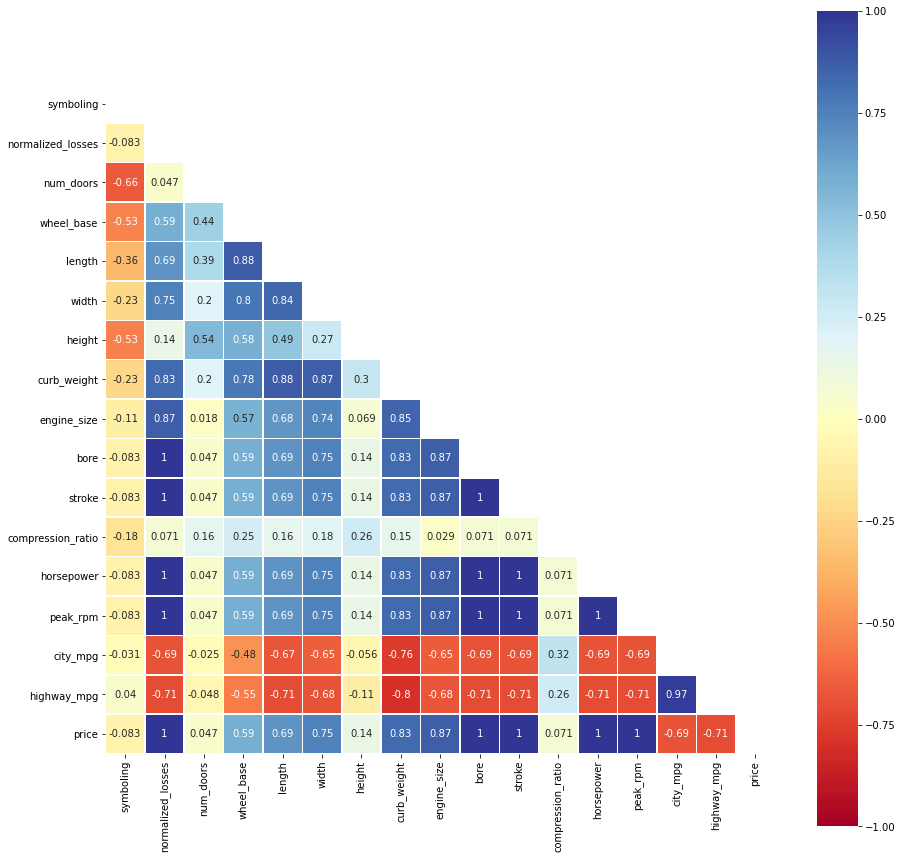

In [28]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask)

